In [1]:
println("Hello")
print("$(homedir())")

Hello
/home/jovyan

In [4]:
# Temporarily uncomment these if you need something installed for usage.
using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("CPUTime")
#Pkg.clone("https://github.com/schmrlng/CPUTime.jl.git")
#Pkg.add("ProfileView")
#Pkg.add("Profile")
#Pkg.add("Dates")
#Pkg.add("Plots")
#Pkg.update()
println("Starting location: $(Base.source_dir())")
# after running this section, wait a bit to see if something starts installing

Starting location: /home/jovyan/work/notebooks


In [10]:
#using Dates, CSV, DataFrames, CPUTime, ProfileView, Profile;
using Dates, DataFrames, CSV;

#methods(DataFrames.readtable!)

dfmt = dateformat"yyyy-mm-dd"

# To get mutable columns, you can do CSV.read(file; copycols=true)
df = convert(DataFrame, CSV.read("$(homedir())/work/data/shootings.csv", dateformat=dfmt))
#dataFile = readdlm("$(homedir())/work/data/shootings.csv", ',', header=true)
#df = readtable("$(homedir())/work/data/shootings.csv", header=true)

print("Record Count: ")
println(nrow(df))
first(df) # just to verify it works, wait til you see this print a number

Record Count: 5389


,id,name,date,manner_of_death,armed,age,gender,race
,Int64,String,Date,String,String?,Int64?,String?,String?
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A


In [11]:
# Sort data
using CPUTime

function sort_data()
  return sort(df, 3) # sort by age
end

@time @CPUtime df = sort_data()

first(df, 16)

elapsed CPU time: 1.462454 seconds
  1.618636 seconds (1.72 M allocations: 106.607 MiB, 2.96% gc time)


,id,name,date,manner_of_death,armed
,Int64,String,Date,String,String?
1,3,Tim Elliot,2015-01-02,shot,gun
2,4,Lewis Lee Lembke,2015-01-02,shot,gun
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon
5,9,Michael Rodriguez,2015-01-04,shot,nail gun
6,11,Kenneth Joe Brown,2015-01-04,shot,gun
7,13,Kenneth Arnold Buck,2015-01-05,shot,gun
8,15,Brock Nichols,2015-01-06,shot,gun
9,16,Autumn Steele,2015-01-06,shot,unarmed


In [12]:
# Reduce the Columns before graphing by removing :id

#Possible columns - :id, :name, :date, :manner_of_death, :armed, :age, :gender, :race, :city, 
# :state, :signs_of_mental_illness, :threat_level, :flee, :body_camera
df = df[:, filter(x -> x != :id, names(df))]
df = df[:, [:date, :age]]
first(df, 16)

,date,age
,Date,Int64?
1,2015-01-02,53
2,2015-01-02,47
3,2015-01-03,23
4,2015-01-04,32
5,2015-01-04,39
6,2015-01-04,18
7,2015-01-05,22
8,2015-01-06,35
9,2015-01-06,34


  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]


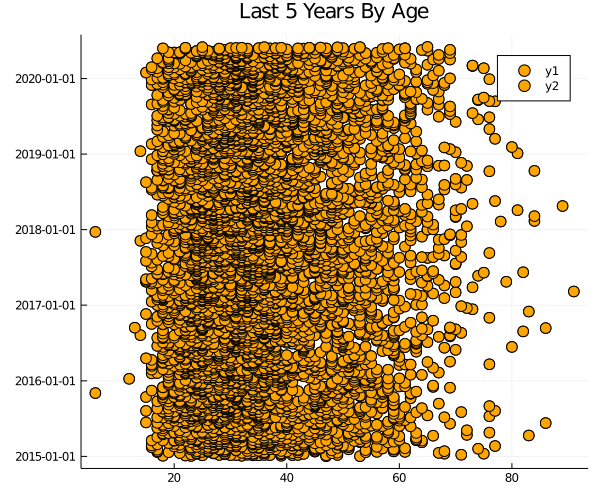

In [22]:
#using Pkg
#Pkg.add("Plots")
#Pkg.add("GR")
#Pkg.add("PyPlot")
#Pkg.add("Gadfly")
#Pkg.add("PlotThemes")
#Pkg.add("Distributions")
#Pkg.add("StatPlots")
#Pkg.add("RDatasets")
Pkg.add("PyCall")
#using Plots, Distributions, PlotThemes, StatPlots, RDatasets
#using Plots.PlotMeasures
#gr(size = (600, 500))
#iris = dataset("datasets","iris")

#@df iris corrplot([:date, :age], grid = false)
using Plots, PyCall

scatter!(df.age, df.date, markersize=6, c=:orange, title="Last 5 Years By Age")
